In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_dataset import load_standardised_dataset
from image_standardisation import restore_standardised_image
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras.models import Model

In [4]:
unet = tf.keras.models.load_model("convolutional_model.h5", custom_objects={"kl_divergence": losses.KLDivergence})


In [5]:
np.random.seed(256)
path_to_dataset = "../SIDD_Small_sliced/Data/"
train_x, train_y, test_x, test_y, val_x, val_y = load_standardised_dataset(path_to_dataset, 1, 10000, 1)

In [6]:
results = unet.evaluate(test_x, test_y)
print(results)

79/79 [==============================] - 11s 132ms/step - loss: 0.0039 - kullback_leibler_divergence: 0.0712 - MAE: 0.0411
[0.003918028436601162, 0.07120542228221893, 0.041075341403484344]


In [7]:
# will attempt to decode all images - might cause a crash, maybe limit to some examples
decoded_imgs = unet.predict(test_x[:50])

2/2 [==============================] - 0s 54ms/step


In [8]:
rgb_decoded_imgs = np.array([restore_standardised_image(img) for img in decoded_imgs])

In [13]:
plt.imsave("image0_org.jpg", restore_standardised_image(test_x[47]))
plt.imsave("image0_gt.jpg", restore_standardised_image(test_y[47]))
plt.imsave("image0_new.jpg", rgb_decoded_imgs[47])

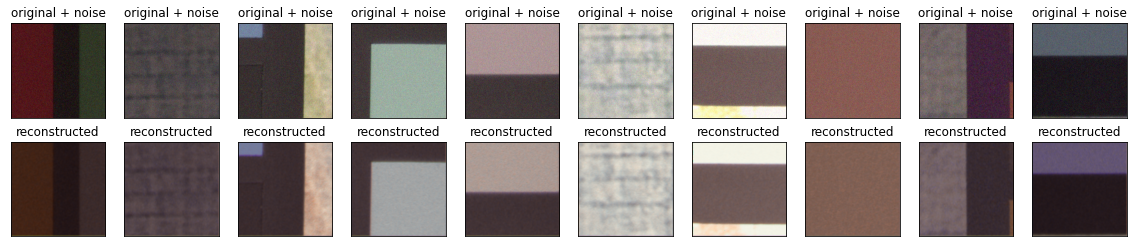

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(restore_standardised_image(test_x[i])))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(rgb_decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()